# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols 

In [12]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

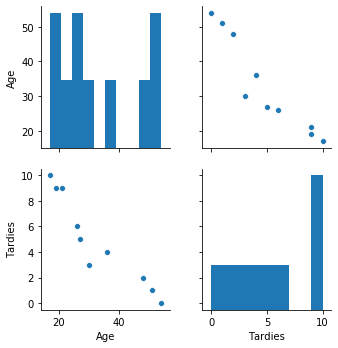

In [13]:
# Your code here.

sns.pairplot(student_data)

Text(0, 0.5, 'Tardies')

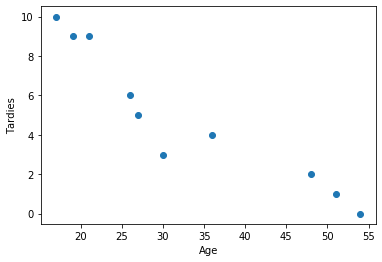

In [25]:
# ANSWER

x = student_data['Age']
y = student_data['Tardies']
fig, ax = plt.subplots(1,1)
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 


# The lower the x value the higher the y value and
# the higher the x value the lower the y value.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [26]:
# Your response here.

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("Tardies ~Age",data=student_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           5.57e-05
Time:                        13:12:34   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.0

In [19]:
student_data.corr()


,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

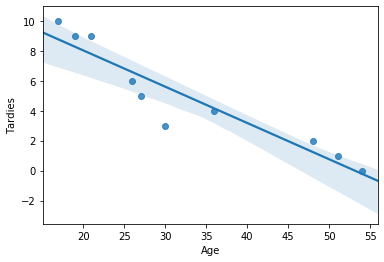

In [20]:
# Your response here.
# Used the axes-level function, the outcome variable is dependent on the age

sns.regplot(x="Age", y="Tardies", data=student_data)

In [34]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
X = pd.DataFrame(data= student_data, columns=['Tardies'])
Y = pd.DataFrame(data= student_data, columns=['Age'])
model = lm.fit(X,Y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("Tardies ~Age",data=student_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           5.57e-05
Time:                        14:16:38   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.0

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [46]:
lm.intercept_

array([50.69884854])

In [37]:
lm.coef_

array([[-3.63241807]])

In [38]:
# R squared score

lm.score(X,Y)

0.8820265558250109

In [39]:
predictions  = lm.predict(X)
y

0    10
1     1
2     5
3     9
4     4
5     2
6     9
7     6
8     0
9     3
Name: Tardies, dtype: int64

Plot your regression model on your scatter plot.

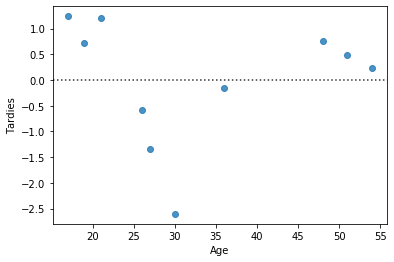

In [45]:
# Your code here.

sns.residplot('Age', 'Tardies', student_data)

In [47]:
comparisons = pd.DataFrame(np.column_stack([Y, predictions]), 
                               columns=['Tardies', 'T_Predicted'])
comparisons

,Tardies,T_Predicted
0,17.0,14.374668
1,51.0,47.066430
2,27.0,32.536758
3,21.0,18.007086
4,36.0,36.169176
5,48.0,43.434012
6,19.0,18.007086
7,26.0,28.904340
8,54.0,50.698849
9,30.0,39.801594


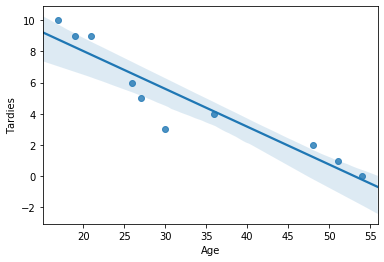

In [48]:
sns.regplot(x="Age", y="Tardies", data= student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 



## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [49]:
# Import any libraries you may need & the data

data = pd.read_csv('/Users/gracemartinez/ironhack/daft-miami-1019-labs/module-2/Regression-Analysis/vehicles.csv')

In [52]:
data.head(100)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Acura,Legend,1987,2.7,6.0,Automatic 4-spd,Front-Wheel Drive,Compact Cars,Regular,18.311667,16,22,18,493.722222,1850
96,Acura,Legend,1987,2.7,6.0,Manual 5-spd,Front-Wheel Drive,Compact Cars,Regular,17.347895,17,23,19,467.736842,1750
97,Acura,Legend,1988,2.7,6.0,Automatic 4-spd,Front-Wheel Drive,Compact Cars,Regular,18.311667,16,21,18,493.722222,1850
98,Acura,Legend,1988,2.7,6.0,Manual 5-spd,Front-Wheel Drive,Compact Cars,Regular,17.347895,17,22,19,467.736842,1750


In [56]:
list(data.columns.values)


['Make',
 'Model',
 'Year',
 'Engine Displacement',
 'Cylinders',
 'Transmission',
 'Drivetrain',
 'Vehicle Class',
 'Fuel Type',
 'Fuel Barrels/Year',
 'City MPG',
 'Highway MPG',
 'Combined MPG',
 'CO2 Emission Grams/Mile',
 'Fuel Cost/Year']

In [63]:
data.columns = map(str.lower, data.columns)
data

,make,model,year,engine displacement,cylinders,transmission,drivetrain,vehicle class,fuel type,fuel barrels/year,city mpg,highway mpg,combined mpg,co2 emission grams/mile,fuel cost/year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [64]:
list(data.columns.values)

['make',
 'model',
 'year',
 'engine displacement',
 'cylinders',
 'transmission',
 'drivetrain',
 'vehicle class',
 'fuel type',
 'fuel barrels/year',
 'city mpg',
 'highway mpg',
 'combined mpg',
 'co2 emission grams/mile',
 'fuel cost/year']

In [85]:
# inplace=True to affect DataFrame
data.rename(columns = {'engine displacement': 'engine_displacement', 'vehicle class': 'vehicle_class', 'fuel type': 'fuel_type',
 'fuel barrels/year': 'fuel_barrels/year', 'city mpg': 'city_mpg', 'highway mpg': 'highway_mpg',
 'combined mpg': 'combined_mpg', 'co2 emission grams/mile': 'co2_emission_grams/mile',
 'fuel cost/year': 'fuel_cost/year'}, inplace=True)

In [86]:
list(data.columns.values)

['make',
 'model',
 'year',
 'engine_displacement',
 'cylinders',
 'transmission',
 'drivetrain',
 'vehicle_class',
 'fuel_type',
 'fuel_barrels/year',
 'city_mpg',
 'highway_mpg',
 'combined_mpg',
 'co2_emission grams/mile',
 'fuel_cost/year']

In [91]:
data.head()

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels/year,city_mpg,highway_mpg,combined_mpg,co2_emission grams/mile,fuel_cost/year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [96]:
# Your response here. 

# Y = co2_emission grams/mile # outcome variable
# X = year, cylinders, fuel_barrels/year, combined_mpg, fuel_cost/year

Y = pd.DataFrame(data = data, columns = ['co2_emission grams/mile'])
X = data[['year', 'cylinders', 'fuel_barrels/year', 'combined_mpg', 'fuel_cost/year']]

In [93]:
data.columns # column names

Index(['make', 'model', 'year', 'engine_displacement', 'cylinders',
       'transmission', 'drivetrain', 'vehicle_class', 'fuel_type',
       'fuel_barrels/year', 'city_mpg', 'highway_mpg', 'combined_mpg',
       'co2_emission grams/mile', 'fuel_cost/year'],
      dtype='object')

In [98]:
data.head()

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels/year,city_mpg,highway_mpg,combined_mpg,co2_emission grams/mile,fuel_cost/year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [ ]:
data1 = data
data1.drop(columns=['_', '_'])

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [115]:
# Your response here. 


In [99]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

In [100]:
lm.score(X,Y)

0.9808734920269122

In [101]:
lm.intercept_

array([769.88828365])

In [102]:
lm.coef_

array([[-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948]])

In [103]:
predictions  = lm.predict(X)

In [104]:
mse = mean_squared_error(Y, predictions)
print(mse)

271.11965507029964


In [105]:
r2_score(Y, predictions)

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [108]:
# Your response here. 

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("Y~X",data=data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.687e+05
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:16:22   Log-Likelihood:            -1.5173e+05
No. Observations:               35952   AIC:                         3.035e+05
Df Residuals:                   35946   BIC:                         3.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    769.8883     19.392     39.702      0.0

TRYING OUT DIFFERENT X VARIABLES TO VERIFY ANY BETTER IMPACT OF THE VARIABLE OUTCOME (Y)

In [119]:
Y1 = pd.DataFrame(data = data, columns = ['co2_emission grams/mile'])
X1 = data[['cylinders', 'fuel_barrels/year', 'combined_mpg', 'fuel_cost/year']]

In [120]:
lm = linear_model.LinearRegression()
model = lm.fit(X1,Y1)

In [121]:
lm.score(X1,Y1)

0.9802919387898396

In [122]:
# ONLY CHANGE

lm.intercept_

array([131.15632475])

In [123]:
# ONLY CHANGE

lm.coef_

array([[ 1.04483633, 19.62713308, -3.16658852,  0.029393  ]])

In [124]:
predictions  = lm.predict(X1)

In [125]:
# ONLY CHANGE

mse = mean_squared_error(Y1, predictions)
print(mse)

279.3632149120654


In [126]:
r2_score(Y, predictions)

0.9802919387898396

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [117]:
# Your code here. 

party_data = pd.DataFrame({'people_invited': [1, 3, 4, 6, 8, 9, 11, 14], 'people_attended': [1, 2, 4, 4, 5, 7, 8, 13]})
party_data



,people_invited,people_attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Text(0, 0.5, 'people_attended')

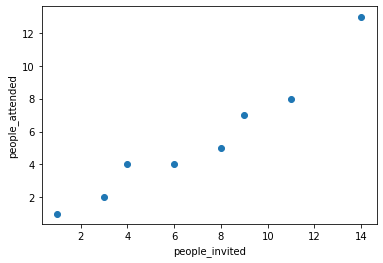

In [118]:
# Your code here.

x = party_data['people_invited']
y = party_data['people_attended']
fig, ax = plt.subplots(1,1)
plt.scatter(x,y)
plt.xlabel('people_invited')
plt.ylabel('people_attended')

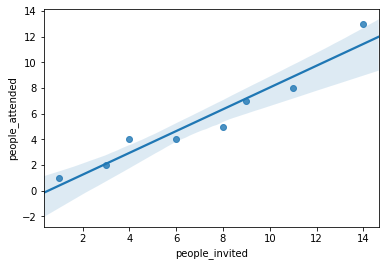

In [128]:
sns.regplot(x="people_invited", y="people_attended", data=party_data)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Generally the more people are invited the more people are able to attend.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 



What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

